In [1]:
import pandas as pd
import missingno as msno
import numpy as np

In [2]:
data = pd.read_csv("./data/marketing_campaign.csv")

In [3]:
data.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
2087,6343.0,1959.0,Graduation,NaN,79823,0.0,1.0,NaN,6.0,835.0,73.0,43.0,1.0,NaN,9.0,7.0,2.0,0.0,0.0,0.0
1219,9739.0,1963.0,Graduation,Single,NaN,0.0,1.0,19-01-2013,55.0,62.0,0.0,26.0,NaN,2.0,2.0,2.0,NaN,0.0,0.0,0.0
1223,938.0,NaN,Graduation,Married,40211,1.0,1.0,30-07-2013,30.0,51.0,1.0,NaN,2.0,2.0,NaN,2.0,8.0,0.0,0.0,0.0
452,NaN,1971.0,Master,Single,NaN,1.0,NaN,17-10-2013,17.0,14.0,2.0,3.0,1.0,NaN,0.0,4.0,5.0,0.0,NaN,0.0
427,8746.0,1989.0,Graduation,Married,NaN,1.0,0.0,5/4/2014,28.0,800.0,NaN,57.0,2.0,2.0,5.0,10.0,6.0,1.0,0.0,0.0


In [4]:
data.Response.unique()

array([ 1.,  0., nan])

In [ ]:
# label encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [286]:
data_copy = data.copy()

In [287]:
for col in ['Education', 'Marital_Status']:
    data_copy[col] = encoder.fit_transform(data_copy[col])

In [288]:
print(data_copy['Marital_Status'].unique())
print(data['Marital_Status'].unique())

[4 8 3 5 2 6 1 0 7]
['Single' nan 'Married' 'Together' 'Divorced' 'Widow' 'Alone' 'Absurd'
 'YOLO']


In [289]:
data_copy['Marital_Status'] = data_copy['Marital_Status'].replace(8, np.nan)

In [290]:
print(data_copy['Education'].unique())
print(data['Education'].unique())


[2 6 5 3 1 0 4]
['Graduation' nan 'PhD' 'Master' 'Basic' '2n Cycle' 'Master Student']


In [291]:
data_copy['Education'] = data_copy['Education'].replace(6, np.nan)

In [292]:
data_copy.sample(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
1945,NaN,1951.0,2.0,NaN,70792,0.0,NaN,NaN,82.0,344.0,45.0,114.0,2.0,3.0,NaN,10.0,3.0,0.0,0.0,NaN
1366,NaN,1976.0,2.0,4.0,47025,0.0,1.0,7/11/2013,52.0,254.0,NaN,NaN,3.0,6.0,3.0,5.0,6.0,0.0,0.0,0.0
1925,3112.0,1977.0,3.0,NaN,22701,1.0,0.0,NaN,2.0,2.0,4.0,5.0,1.0,1.0,0.0,NaN,5.0,0.0,NaN,0.0
1805,9284.0,1958.0,2.0,5.0,53977,0.0,1.0,8/6/2013,21.0,620.0,NaN,82.0,5.0,5.0,5.0,12.0,5.0,0.0,0.0,NaN
2090,4865.0,1974.0,3.0,2.0,NaN,1.0,1.0,31-08-2013,2.0,229.0,7.0,NaN,7.0,5.0,NaN,8.0,7.0,0.0,NaN,1.0
997,11188.0,1957.0,2.0,5.0,26091,1.0,1.0,NaN,84.0,15.0,10.0,20.0,3.0,NaN,1.0,3.0,5.0,0.0,0.0,0.0
174,641.0,1967.0,2.0,4.0,52074,0.0,1.0,4/4/2014,77.0,59.0,0.0,48.0,1.0,2.0,2.0,2.0,4.0,0.0,0.0,NaN


In [293]:
data_copy = data_copy.drop(['ID'], axis = 1)

In [294]:
data_copy

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,1957.0,2.0,4.0,"$2,424",NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,1954.0,NaN,4.0,46344,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,1965.0,2.0,NaN,71613,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,1984.0,2.0,NaN,26646,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,NaN,5.0,3.0,58293,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967.0,2.0,3.0,61223,0.0,1.0,13-06-2013,46.0,709.0,43.0,247.0,2.0,NaN,3.0,4.0,NaN,NaN,0.0,NaN
2236,1946.0,5.0,5.0,NaN,2.0,1.0,10/6/2014,56.0,406.0,0.0,NaN,7.0,NaN,2.0,5.0,7.0,1.0,0.0,0.0
2237,1981.0,2.0,2.0,NaN,0.0,NaN,25-01-2014,91.0,908.0,48.0,24.0,1.0,2.0,3.0,13.0,NaN,0.0,NaN,0.0
2238,1956.0,3.0,NaN,69245,0.0,1.0,NaN,8.0,428.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


In [295]:
#from datetime import datetime
#new_col =[]

#for x in range(len(data_copy['Dt_Customer'])):
 #   date = pd.to_datetime(data_copy['Dt_Customer'][x])
  #  year = datetime.today().year - age.year
   # new_col.append(year)



In [296]:
#data_copy['Age'] = new_col

In [297]:
data.Dt_Customer

0         4/9/2012
1         8/3/2014
2       21-08-2013
3        10/2/2014
4       19-01-2014
           ...    
2235    13-06-2013
2236     10/6/2014
2237    25-01-2014
2238           NaN
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [298]:
#data_copy['Dt_Customer'] = pd.to_datetime(data_copy['Dt_Customer'],  dayfirst=True,)

In [299]:
data_copy

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,1957.0,2.0,4.0,"$2,424",NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,1954.0,NaN,4.0,46344,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,1965.0,2.0,NaN,71613,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,1984.0,2.0,NaN,26646,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,NaN,5.0,3.0,58293,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967.0,2.0,3.0,61223,0.0,1.0,13-06-2013,46.0,709.0,43.0,247.0,2.0,NaN,3.0,4.0,NaN,NaN,0.0,NaN
2236,1946.0,5.0,5.0,NaN,2.0,1.0,10/6/2014,56.0,406.0,0.0,NaN,7.0,NaN,2.0,5.0,7.0,1.0,0.0,0.0
2237,1981.0,2.0,2.0,NaN,0.0,NaN,25-01-2014,91.0,908.0,48.0,24.0,1.0,2.0,3.0,13.0,NaN,0.0,NaN,0.0
2238,1956.0,3.0,NaN,69245,0.0,1.0,NaN,8.0,428.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


In [300]:
data_copy.Year_Birth

0       1957.0
1       1954.0
2       1965.0
3       1984.0
4          NaN
         ...  
2235    1967.0
2236    1946.0
2237    1981.0
2238    1956.0
2239    1954.0
Name: Year_Birth, Length: 2240, dtype: float64

In [301]:
from datetime import datetime
new_col = []

for x in range(len(data_copy.Year_Birth)):
    age = datetime.today().year - data_copy.Year_Birth[x]
    new_col.append(age)
    

In [302]:
data_copy.Year_Birth = new_col

In [303]:
data_copy.Year_Birth

0       67.0
1       70.0
2       59.0
3       40.0
4        NaN
        ... 
2235    57.0
2236    78.0
2237    43.0
2238    68.0
2239    70.0
Name: Year_Birth, Length: 2240, dtype: float64

In [304]:
data_copy.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,67.0,2.0,4.0,"$2,424",NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,70.0,NaN,4.0,46344,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,59.0,2.0,NaN,71613,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,40.0,2.0,NaN,26646,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,NaN,5.0,3.0,58293,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0


In [305]:
data_copy.Income.unique()

array(['$2,424 ', '46344', '71613', ..., '666666', '61223', '69245'],
      dtype=object)

In [306]:
data_copy['Income'] = data_copy['Income'].str.replace('$', '')
data_copy['Income'] = data_copy['Income'].str.replace(',', '')
data_copy['Income'] = data_copy['Income'].astype(float)

In [307]:
data_copy['Income'] 

0        2424.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236        NaN
2237        NaN
2238    69245.0
2239        NaN
Name: Income, Length: 2240, dtype: float64

In [308]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1925 non-null   float64
 1   Education            1921 non-null   float64
 2   Marital_Status       1924 non-null   float64
 3   Income               1855 non-null   float64
 4   Kidhome              1921 non-null   float64
 5   Teenhome             1950 non-null   float64
 6   Dt_Customer          1929 non-null   object 
 7   Recency              1930 non-null   float64
 8   MntWines             1907 non-null   float64
 9   MntFruits            1930 non-null   float64
 10  MntGoldProds         1921 non-null   float64
 11  NumDealsPurchases    1936 non-null   float64
 12  NumWebPurchases      1907 non-null   float64
 13  NumCatalogPurchases  1900 non-null   float64
 14  NumStorePurchases    1915 non-null   float64
 15  NumWebVisitsMonth    1927 non-null   f

In [309]:
#data_copy['Income'] = encoder.fit_transform(data_copy['Income'])

In [310]:
data_copy['Dt_Customer']

0         4/9/2012
1         8/3/2014
2       21-08-2013
3        10/2/2014
4       19-01-2014
           ...    
2235    13-06-2013
2236     10/6/2014
2237    25-01-2014
2238           NaN
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [311]:
data['Dt_Customer'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238     True
2239    False
Name: Dt_Customer, Length: 2240, dtype: bool

In [312]:
data_Dt_Customer = data_copy['Dt_Customer']

In [313]:
data_Dt_Customer

0         4/9/2012
1         8/3/2014
2       21-08-2013
3        10/2/2014
4       19-01-2014
           ...    
2235    13-06-2013
2236     10/6/2014
2237    25-01-2014
2238           NaN
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [314]:
#data_copy = data_copy.drop('Dt_Customer', axis=1)

In [315]:
data_copy

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,67.0,2.0,4.0,2424.0,NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,70.0,NaN,4.0,46344.0,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,59.0,2.0,NaN,71613.0,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,40.0,2.0,NaN,26646.0,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,NaN,5.0,3.0,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57.0,2.0,3.0,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,247.0,2.0,NaN,3.0,4.0,NaN,NaN,0.0,NaN
2236,78.0,5.0,5.0,NaN,2.0,1.0,10/6/2014,56.0,406.0,0.0,NaN,7.0,NaN,2.0,5.0,7.0,1.0,0.0,0.0
2237,43.0,2.0,2.0,NaN,0.0,NaN,25-01-2014,91.0,908.0,48.0,24.0,1.0,2.0,3.0,13.0,NaN,0.0,NaN,0.0
2238,68.0,3.0,NaN,69245.0,0.0,1.0,NaN,8.0,428.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


<Axes: >

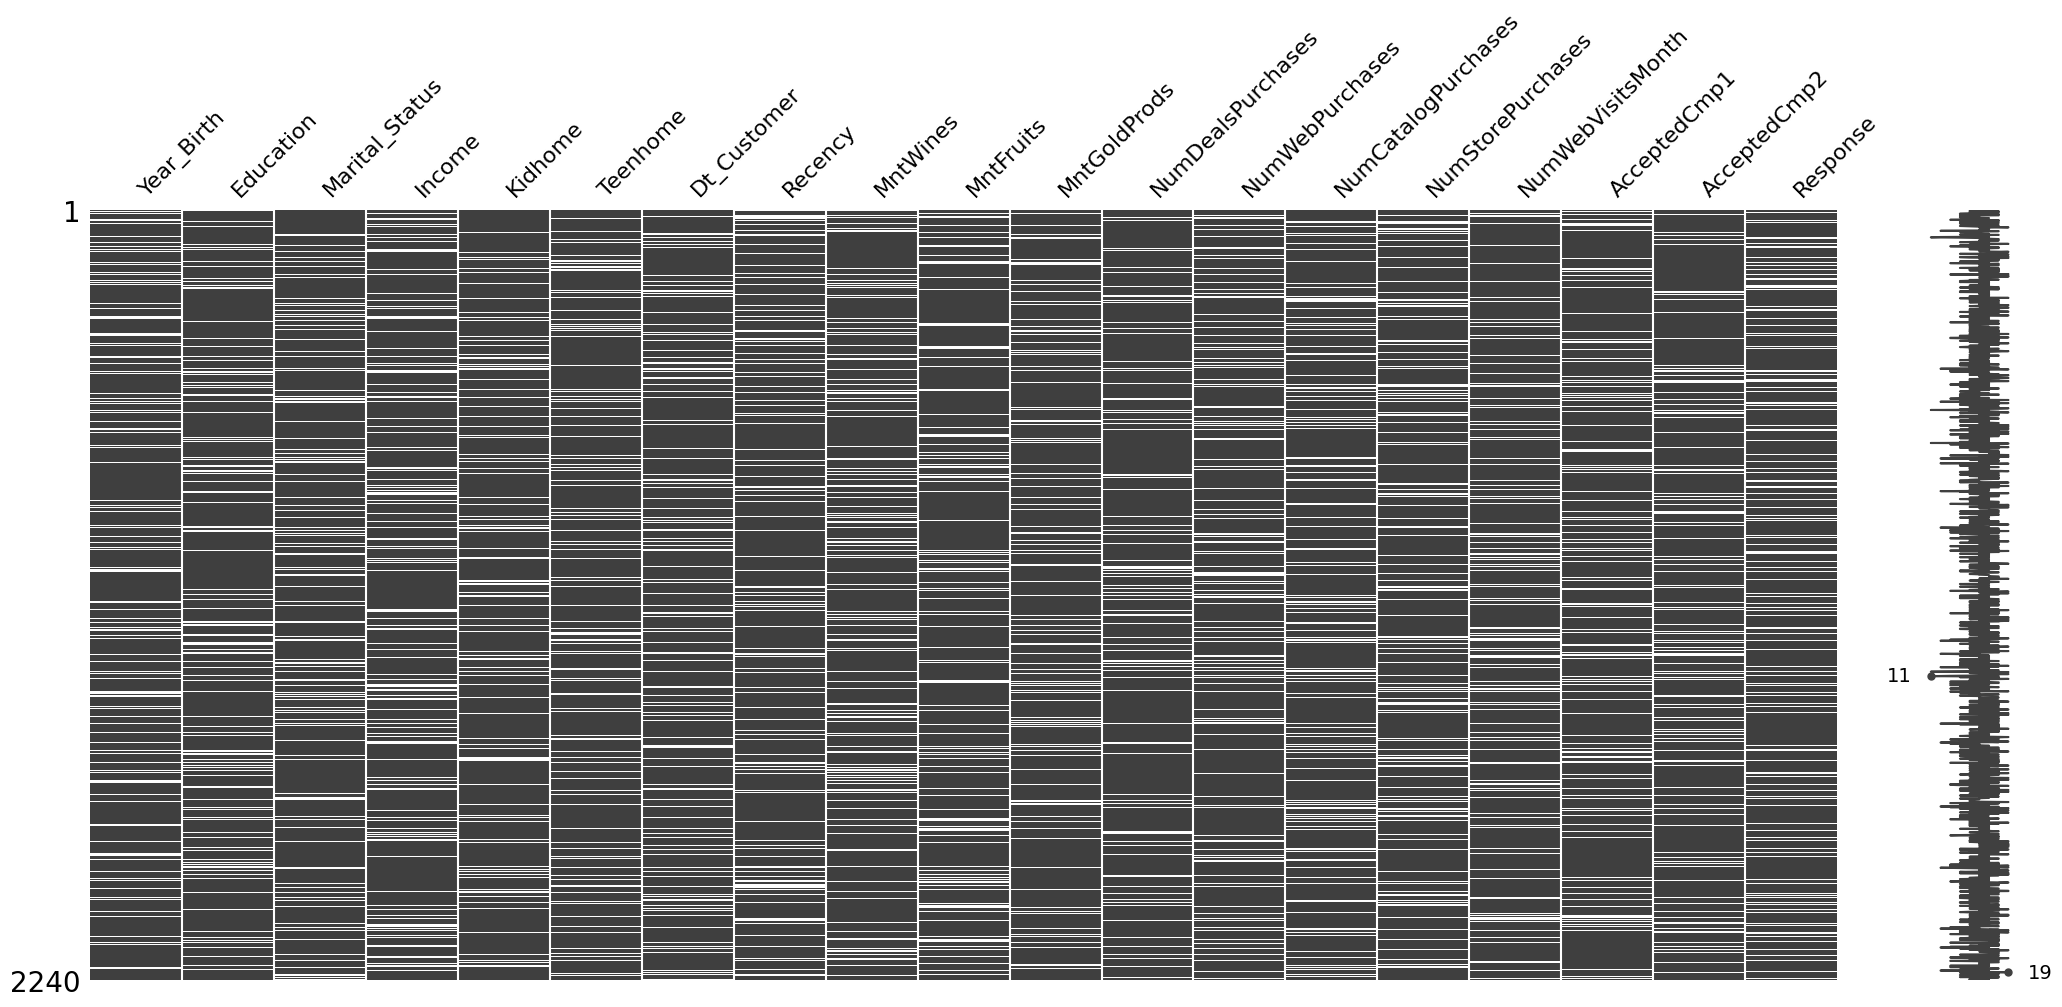

In [316]:
msno.matrix(data_copy)

<Axes: >

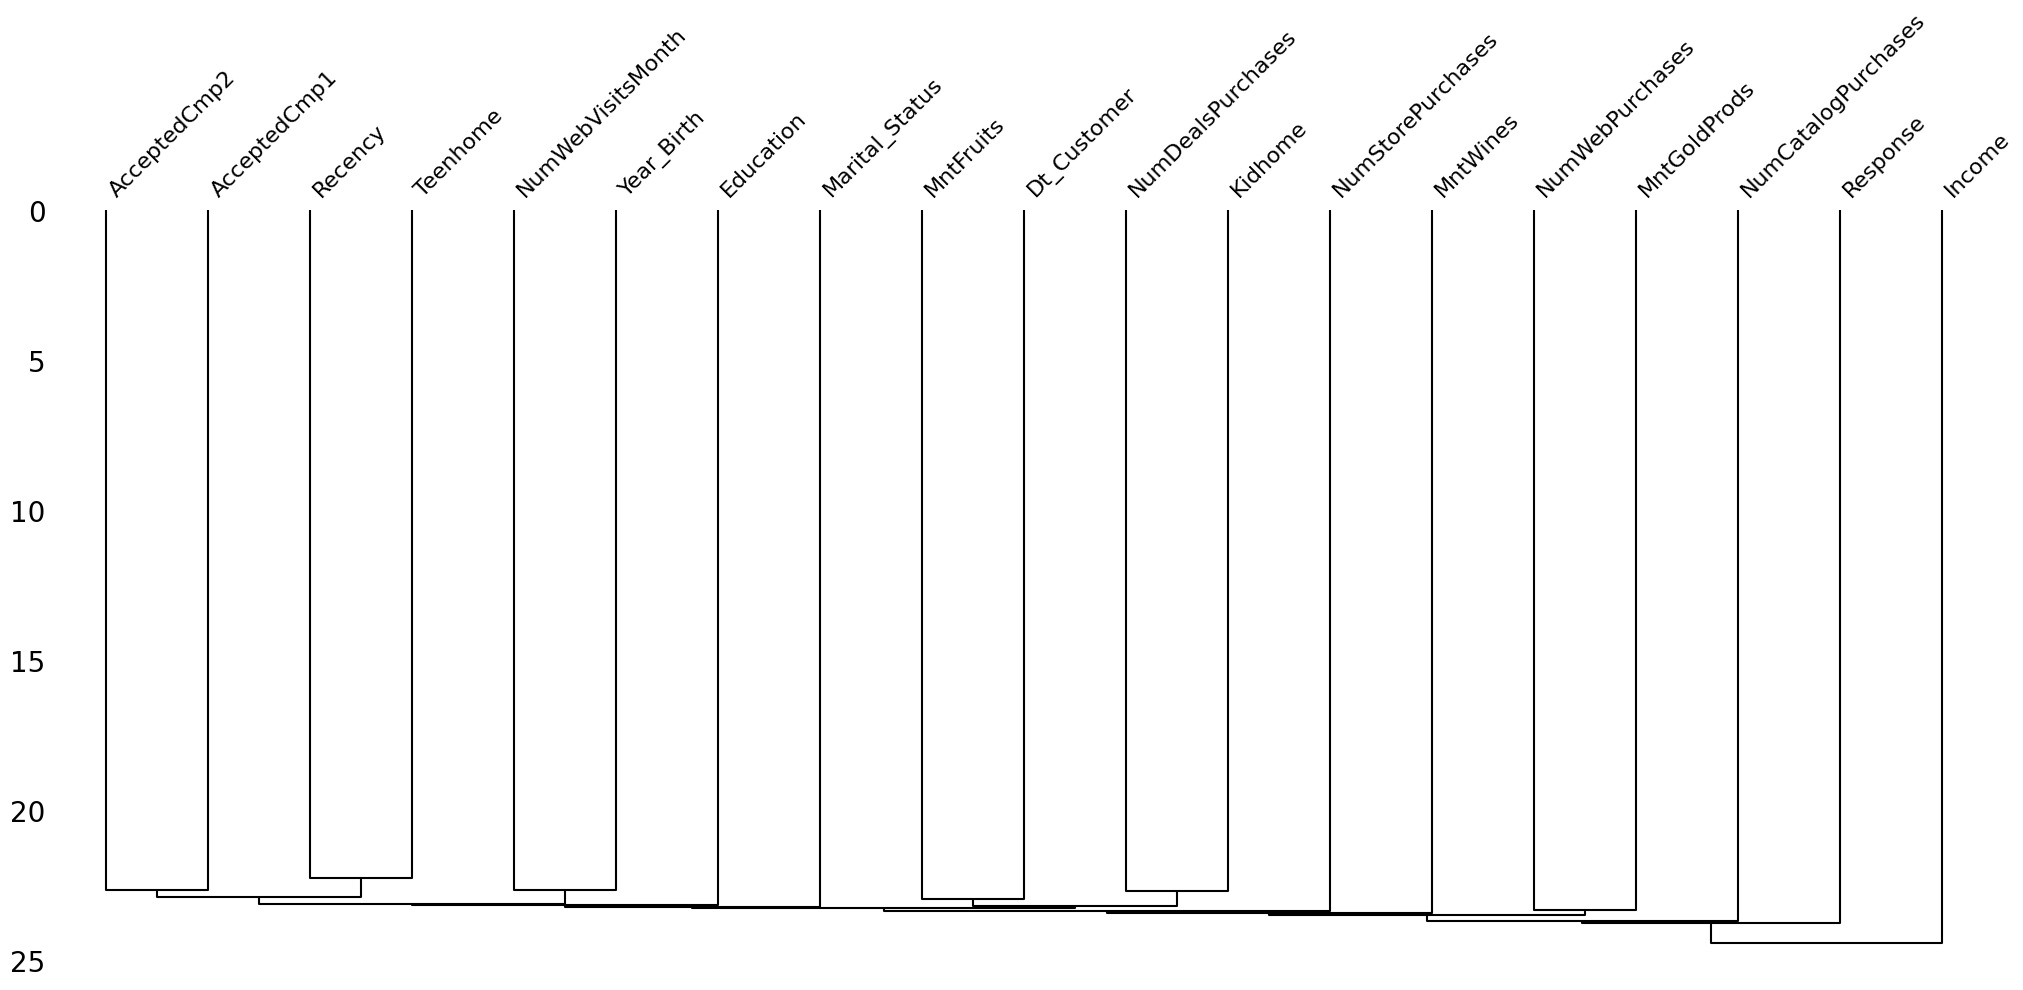

In [317]:
msno.dendrogram(data_copy)

In [318]:
data_copy.isnull().sum()

Year_Birth             315
Education              319
Marital_Status         316
Income                 385
Kidhome                319
Teenhome               290
Dt_Customer            311
Recency                310
MntWines               333
MntFruits              310
MntGoldProds           319
NumDealsPurchases      304
NumWebPurchases        333
NumCatalogPurchases    340
NumStorePurchases      325
NumWebVisitsMonth      313
AcceptedCmp1           296
AcceptedCmp2           318
Response               340
dtype: int64

In [319]:
data_copy = data_copy.dropna(subset=['Response'],axis=0)

In [320]:
data_copy.isnull().sum()

Year_Birth             266
Education              273
Marital_Status         261
Income                 334
Kidhome                274
Teenhome               249
Dt_Customer            261
Recency                273
MntWines               289
MntFruits              269
MntGoldProds           269
NumDealsPurchases      264
NumWebPurchases        276
NumCatalogPurchases    294
NumStorePurchases      276
NumWebVisitsMonth      270
AcceptedCmp1           257
AcceptedCmp2           266
Response                 0
dtype: int64

In [321]:
data.info()
# Education Marital_Status -> kategoriski
# site ostanati numericki

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1932 non-null   float64
 1   Year_Birth           1925 non-null   float64
 2   Education            1921 non-null   object 
 3   Marital_Status       1924 non-null   object 
 4   Income               1855 non-null   object 
 5   Kidhome              1921 non-null   float64
 6   Teenhome             1950 non-null   float64
 7   Dt_Customer          1929 non-null   object 
 8   Recency              1930 non-null   float64
 9   MntWines             1907 non-null   float64
 10  MntFruits            1930 non-null   float64
 11  MntGoldProds         1921 non-null   float64
 12  NumDealsPurchases    1936 non-null   float64
 13  NumWebPurchases      1907 non-null   float64
 14  NumCatalogPurchases  1900 non-null   float64
 15  NumStorePurchases    1915 non-null   f

<Axes: >

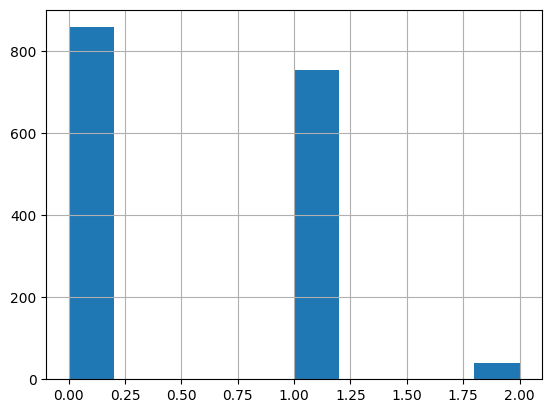

In [322]:
data_copy['Teenhome'].hist()



<Axes: >

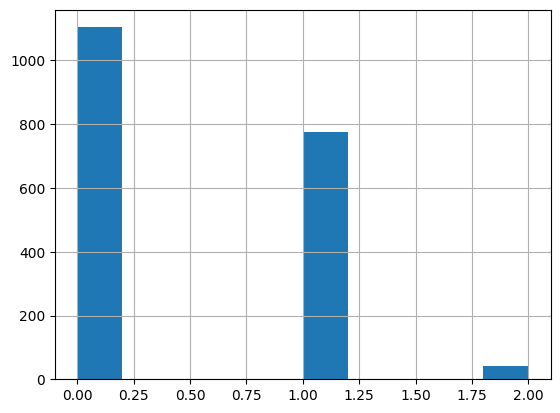

In [323]:
data['Kidhome'].hist()

In [324]:
data_copy.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,67.0,2.0,4.0,2424.0,NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,70.0,NaN,4.0,46344.0,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,59.0,2.0,NaN,71613.0,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,40.0,2.0,NaN,26646.0,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,NaN,5.0,3.0,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
5,57.0,3.0,5.0,NaN,0.0,NaN,9/9/2013,NaN,520.0,42.0,NaN,2.0,6.0,4.0,10.0,6.0,0.0,0.0,0.0
6,53.0,NaN,2.0,55635.0,0.0,1.0,13-11-2012,34.0,235.0,65.0,27.0,4.0,7.0,3.0,7.0,6.0,0.0,0.0,0.0
8,50.0,5.0,5.0,30351.0,NaN,0.0,6/6/2013,19.0,NaN,0.0,2.0,NaN,3.0,0.0,2.0,9.0,0.0,0.0,1.0
9,74.0,5.0,5.0,5648.0,1.0,1.0,NaN,68.0,28.0,NaN,13.0,1.0,NaN,NaN,0.0,20.0,0.0,0.0,0.0
10,NaN,2.0,3.0,NaN,1.0,0.0,15-11-2013,11.0,5.0,NaN,NaN,1.0,1.0,0.0,2.0,NaN,0.0,0.0,0.0


In [325]:
data.NumWebPurchases.unique()

array([ 8.,  1.,  2.,  5.,  6.,  7.,  4.,  3., nan, 11., 27.,  0., 10.,
        9., 23., 25.])

In [326]:
#data_copy['Dt_Customer'] = data_copy['Dt_Customer'].str.replace('/','-')
#data_copy.loc[:, 'Dt_Customer'] = data_copy['Dt_Customer'].str.replace('/', '-')


In [327]:
data_copy['Dt_Customer']

0         4/9/2012
1         8/3/2014
2       21-08-2013
3        10/2/2014
4       19-01-2014
           ...    
2234      1/7/2013
2236     10/6/2014
2237    25-01-2014
2238           NaN
2239    15-10-2012
Name: Dt_Customer, Length: 1900, dtype: object

In [328]:
from datetime import datetime
new_col = []

for x in range(len(data_copy['Dt_Customer'])):
    date = pd.to_datetime(data_copy['Dt_Customer'].iloc[x])
    age = date.year
    new_col.append(age)

    

/var/folders/rt/l8c63yl53pn32_ygkcw5__bw0000gn/T/ipykernel_2969/1300625607.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date = pd.to_datetime(data_copy['Dt_Customer'].iloc[x])


In [329]:
#data_copy['Dt_Customer'] = pd.to_datetime(data_copy['Dt_Customer'], dayfirst=True)

In [330]:
#data_copy['Dt_Customer']  = new_col
data_copy.loc[:, 'Dt_Customer'] = new_col

## len(data_Dt_Customer)

In [331]:
data_copy['Dt_Customer'] 

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2234    2013
2236    2014
2237    2014
2238     NaN
2239    2012
Name: Dt_Customer, Length: 1900, dtype: object

In [332]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1900 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1634 non-null   float64
 1   Education            1627 non-null   float64
 2   Marital_Status       1639 non-null   float64
 3   Income               1566 non-null   float64
 4   Kidhome              1626 non-null   float64
 5   Teenhome             1651 non-null   float64
 6   Dt_Customer          1639 non-null   object 
 7   Recency              1627 non-null   float64
 8   MntWines             1611 non-null   float64
 9   MntFruits            1631 non-null   float64
 10  MntGoldProds         1631 non-null   float64
 11  NumDealsPurchases    1636 non-null   float64
 12  NumWebPurchases      1624 non-null   float64
 13  NumCatalogPurchases  1606 non-null   float64
 14  NumStorePurchases    1624 non-null   float64
 15  NumWebVisitsMonth    1630 non-null   float6

In [333]:
data_copy

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,67.0,2.0,4.0,2424.0,NaN,NaN,2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,70.0,NaN,4.0,46344.0,1.0,1.0,2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,59.0,2.0,NaN,71613.0,NaN,0.0,2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,40.0,2.0,NaN,26646.0,1.0,0.0,2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,NaN,5.0,3.0,58293.0,1.0,0.0,2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,50.0,2.0,3.0,34421.0,NaN,0.0,2013,81.0,NaN,3.0,9.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0
2236,78.0,5.0,5.0,NaN,2.0,1.0,2014,56.0,406.0,0.0,NaN,7.0,NaN,2.0,5.0,7.0,1.0,0.0,0.0
2237,43.0,2.0,2.0,NaN,0.0,NaN,2014,91.0,908.0,48.0,24.0,1.0,2.0,3.0,13.0,NaN,0.0,NaN,0.0
2238,68.0,3.0,NaN,69245.0,0.0,1.0,NaN,8.0,428.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


In [334]:
data.info()
# Education Marital_Status -> kategoriski
# site ostanati numericki



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1932 non-null   float64
 1   Year_Birth           1925 non-null   float64
 2   Education            1921 non-null   object 
 3   Marital_Status       1924 non-null   object 
 4   Income               1855 non-null   object 
 5   Kidhome              1921 non-null   float64
 6   Teenhome             1950 non-null   float64
 7   Dt_Customer          1929 non-null   object 
 8   Recency              1930 non-null   float64
 9   MntWines             1907 non-null   float64
 10  MntFruits            1930 non-null   float64
 11  MntGoldProds         1921 non-null   float64
 12  NumDealsPurchases    1936 non-null   float64
 13  NumWebPurchases      1907 non-null   float64
 14  NumCatalogPurchases  1900 non-null   float64
 15  NumStorePurchases    1915 non-null   f

(array([1612.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          22.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

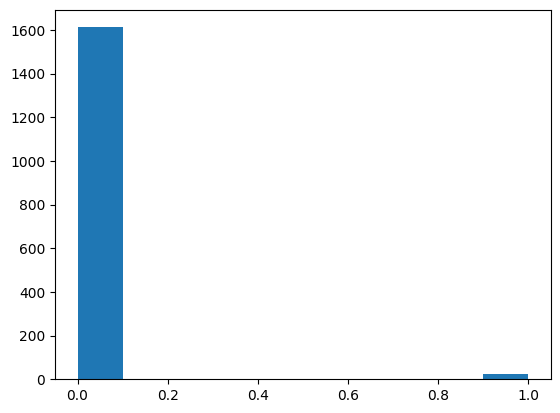

In [335]:
data_copy.AcceptedCmp2.unique()
plt.hist(data_copy.AcceptedCmp2)

(array([858.,   0.,   0.,   0.,   0., 753.,   0.,   0.,   0.,  40.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

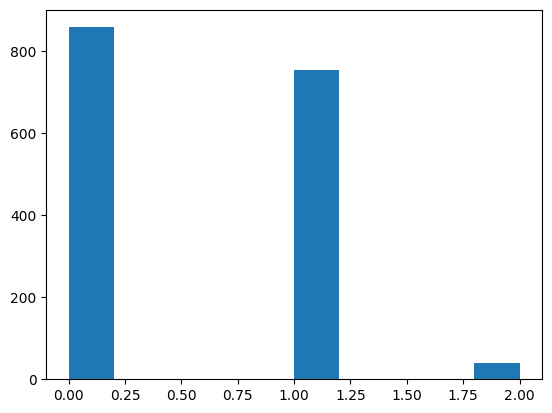

In [336]:
data_copy.Teenhome.unique()
plt.hist(data_copy.Teenhome)

In [337]:

data_copy.NumWebVisitsMonth.unique()

array([ 7.,  5.,  4.,  6.,  9., 20., nan,  8.,  2.,  3.,  1., 10.,  0.,
       14., 19., 13.])

<Axes: >

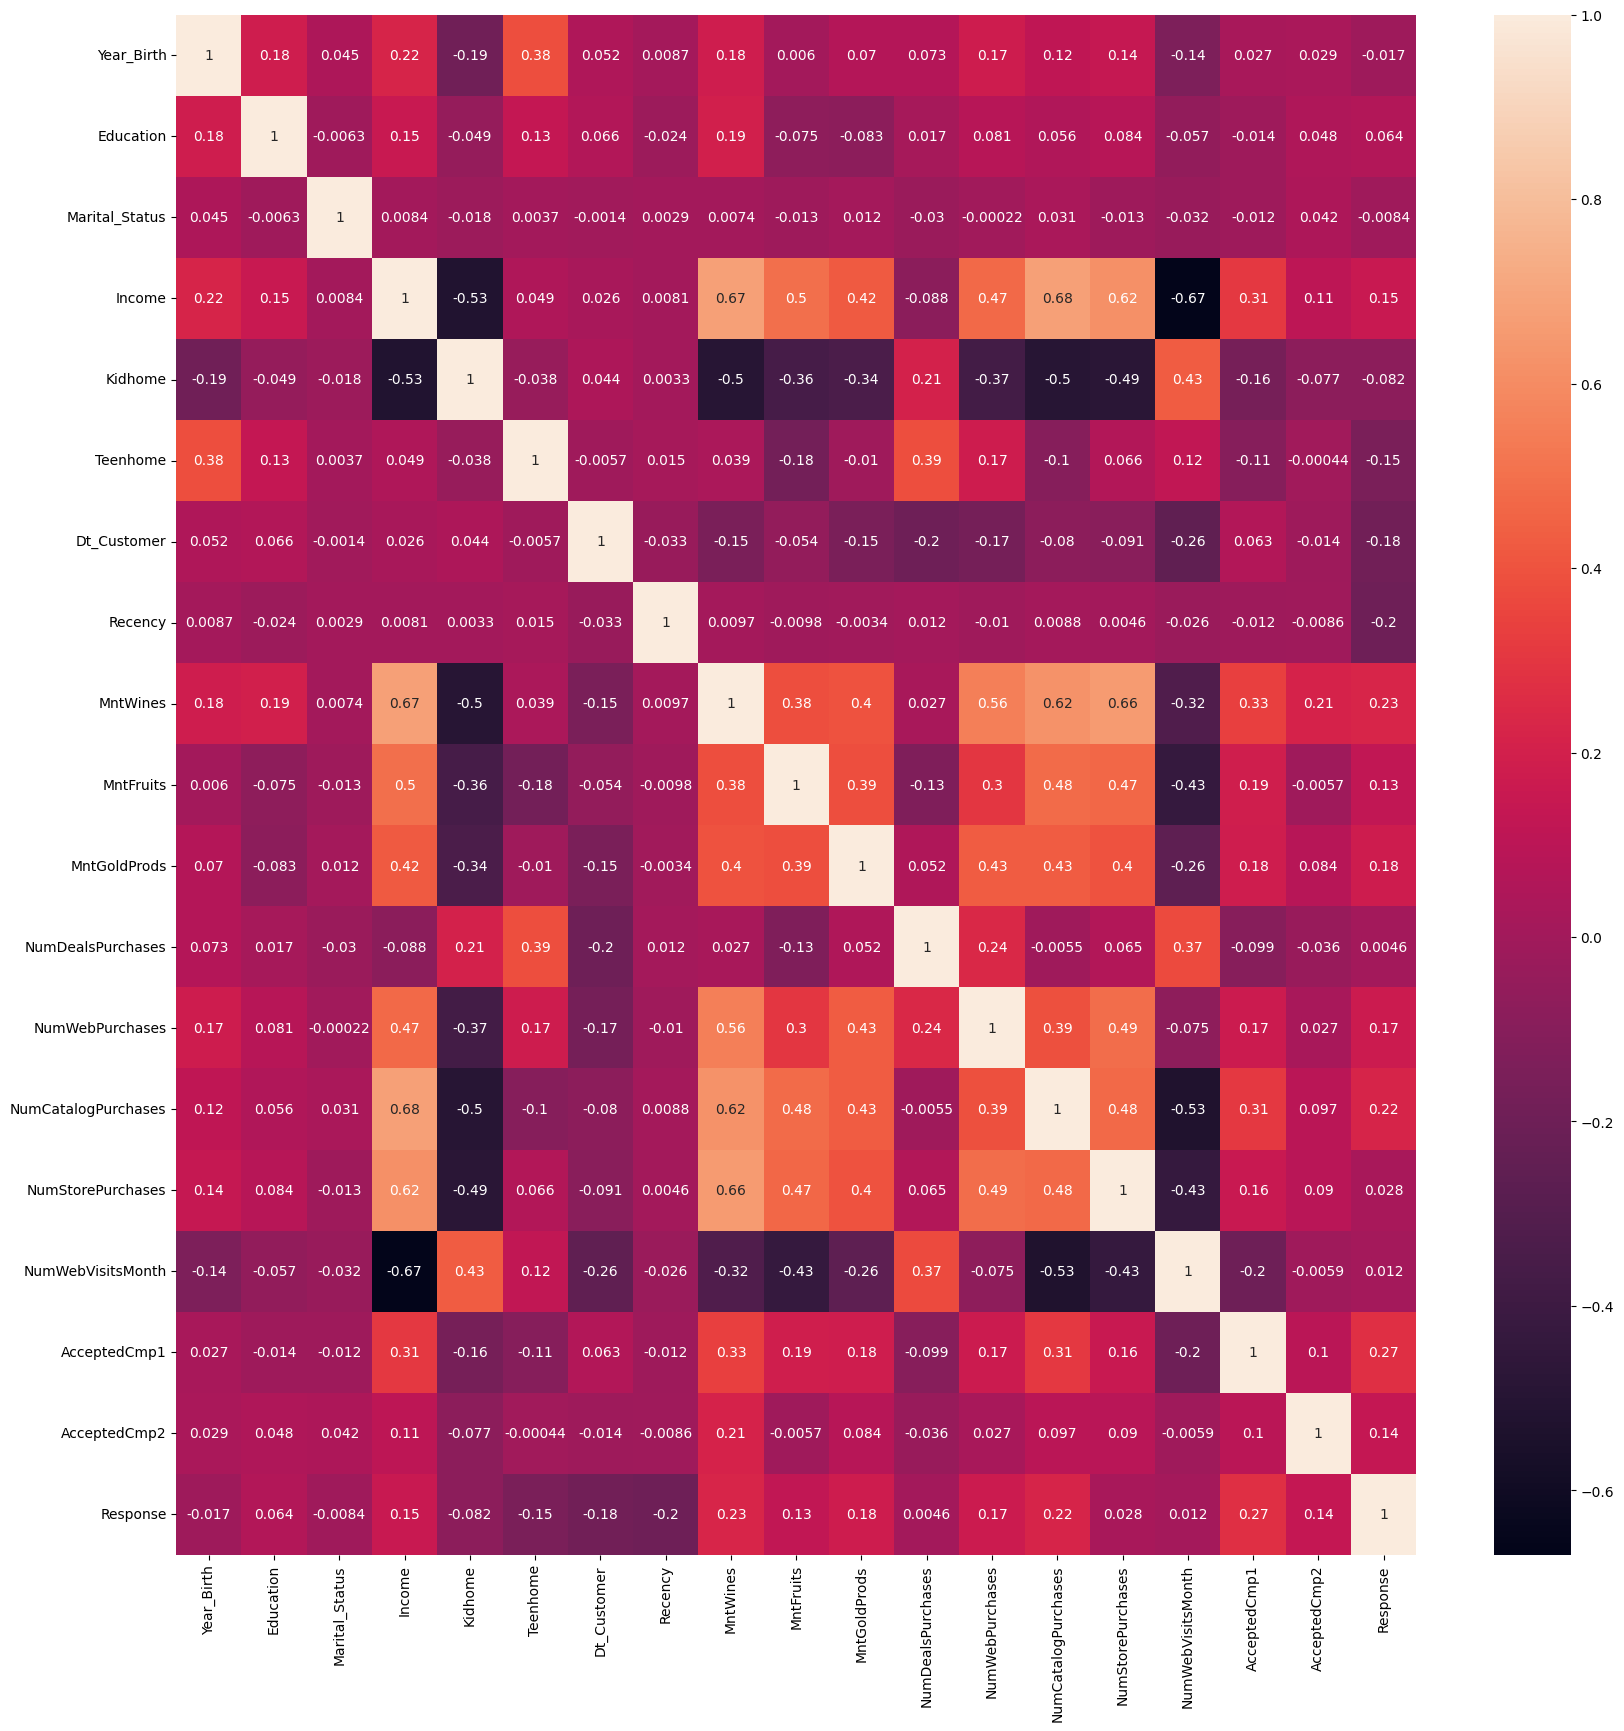

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(data_copy.corr(), annot=True)

(array([127., 294., 349., 532., 320.,   2.,   1.,   1.,   0.,   4.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

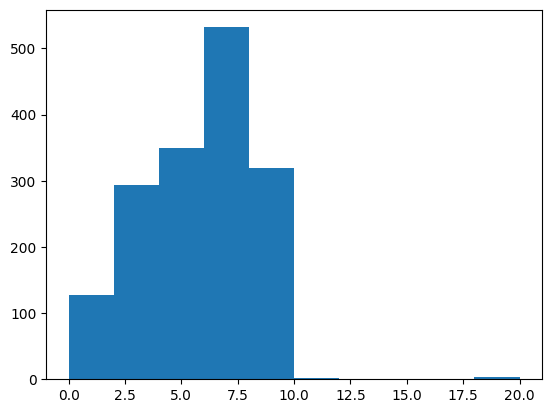

In [339]:
plt.hist(data_copy['NumWebVisitsMonth'])

In [340]:
feature_median = data_copy.drop(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2'], axis=1)

In [341]:
from sklearn.impute import SimpleImputer, KNNImputer
simple_imputer = SimpleImputer(strategy = 'median')
knn_imputer = KNNImputer(n_neighbors = 3)



,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,67.0,2.0,4.0,2424.0,NaN,NaN,2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,70.0,NaN,4.0,46344.0,1.0,1.0,2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,59.0,2.0,NaN,71613.0,NaN,0.0,2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,40.0,2.0,NaN,26646.0,1.0,0.0,2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,NaN,5.0,3.0,58293.0,1.0,0.0,2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,50.0,2.0,3.0,34421.0,NaN,0.0,2013,81.0,NaN,3.0,9.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0
2236,78.0,5.0,5.0,NaN,2.0,1.0,2014,56.0,406.0,0.0,NaN,7.0,NaN,2.0,5.0,7.0,1.0,0.0,0.0
2237,43.0,2.0,2.0,NaN,0.0,NaN,2014,91.0,908.0,48.0,24.0,1.0,2.0,3.0,13.0,NaN,0.0,NaN,0.0
2238,68.0,3.0,NaN,69245.0,0.0,1.0,NaN,8.0,428.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


In [342]:
data_copy.isnull().sum()

Year_Birth             266
Education              273
Marital_Status         261
Income                 334
Kidhome                274
Teenhome               249
Dt_Customer            261
Recency                273
MntWines               289
MntFruits              269
MntGoldProds           269
NumDealsPurchases      264
NumWebPurchases        276
NumCatalogPurchases    294
NumStorePurchases      276
NumWebVisitsMonth      270
AcceptedCmp1           257
AcceptedCmp2           266
Response                 0
dtype: int64

In [346]:
data_copy_2 = data_copy.copy()


In [345]:
#data_copy.feature_median = pd.DataFrame(simple_imputer.fit_transform(feture_median)[0]) # should fill missing values with 'Earth' since it's the most frequent


In [355]:
imputed_data = simple_imputer.fit_transform(feature_median)

# Convert back to a DataFrame with the same column names
imputed_df = pd.DataFrame(imputed_data, columns=feature_median.columns, index=feature_median.index)

# Update the original DataFrame
data_copy_2[feature_median.columns] = imputed_df

In [357]:
data_copy_2.isnull().sum()

Year_Birth               0
Education              273
Marital_Status         261
Income                   0
Kidhome                274
Teenhome               249
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp1           257
AcceptedCmp2           266
Response                 0
dtype: int64

In [ ]:
# ova se features koi se kategoriski; gi zimame site ostanati
feature_median = data_copy.drop(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2'], axis=1)

imputer = simple_imputer.fit_transform(feature_median)
imputet_df = pd.DataFrame(imputer, columns = feature_median, index= feature_median.index)
data[feature_median.columns] = imputet_df


In [358]:
data_copy_2[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2']] = knn_imputer.fit_transform(data_copy_2[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2']])

In [359]:
data_copy_2.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
dtype: int64

In [360]:
data_copy_2.Response.unique()

array([1., 0.])

In [361]:
X = data_copy_2.drop(["Response"],axis=1)
Y= data_copy_2["Response"]

In [363]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [364]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [365]:
model.fit(X_train,y_train)


GaussianNB()

In [366]:
y_pred = model.predict(X_test)
y_pred

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0.

In [369]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='micro'))
print(f1_score(y_test,y_pred,average='macro'))
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.8157894736842105
0.8157894736842105
0.6627104889429904
[[283  41]
 [ 29  27]]
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       324
         1.0       0.40      0.48      0.44        56

    accuracy                           0.82       380
   macro avg       0.65      0.68      0.66       380
weighted avg       0.83      0.82      0.82       380



In [385]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)


In [387]:
y_pred = model_knn.predict(X_test)

In [386]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [388]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='micro'))
print(f1_score(y_test,y_pred,average='macro'))
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.8342105263157895
0.8342105263157895
0.534014598540146
[[311  13]
 [ 50   6]]
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       324
         1.0       0.32      0.11      0.16        56

    accuracy                           0.83       380
   macro avg       0.59      0.53      0.53       380
weighted avg       0.78      0.83      0.80       380



In [389]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()


In [390]:
model_logistic.fit(X_train,y_train)


/Users/andrijanaarsovska/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [391]:
y_pred = model_logistic.predict(X_test)

In [392]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='micro'))
print(f1_score(y_test,y_pred,average='macro'))
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.8526315789473684
0.8526315789473684
0.49333333333333335
[[322   2]
 [ 54   2]]
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       324
         1.0       0.50      0.04      0.07        56

    accuracy                           0.85       380
   macro avg       0.68      0.51      0.49       380
weighted avg       0.80      0.85      0.79       380



In [393]:
data = pd.read_csv("./data/marketing_campaign.csv")

In [394]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1932 non-null   float64
 1   Year_Birth           1925 non-null   float64
 2   Education            1921 non-null   object 
 3   Marital_Status       1924 non-null   object 
 4   Income               1855 non-null   object 
 5   Kidhome              1921 non-null   float64
 6   Teenhome             1950 non-null   float64
 7   Dt_Customer          1929 non-null   object 
 8   Recency              1930 non-null   float64
 9   MntWines             1907 non-null   float64
 10  MntFruits            1930 non-null   float64
 11  MntGoldProds         1921 non-null   float64
 12  NumDealsPurchases    1936 non-null   float64
 13  NumWebPurchases      1907 non-null   float64
 14  NumCatalogPurchases  1900 non-null   float64
 15  NumStorePurchases    1915 non-null   f

In [397]:
from datetime import datetime
new_col = []

for x in range(len(data['Dt_Customer'])):
    date = pd.to_datetime(data['Dt_Customer'].iloc[x])
    age = date.year
    new_col.append(age)

    

/var/folders/rt/l8c63yl53pn32_ygkcw5__bw0000gn/T/ipykernel_2969/1417637508.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date = pd.to_datetime(data['Dt_Customer'].iloc[x])


In [398]:
data['Dt_Customer'] = new_col

In [399]:
data['Dt_Customer']

0       2012.0
1       2014.0
2       2013.0
3       2014.0
4       2014.0
         ...  
2235    2013.0
2236    2014.0
2237    2014.0
2238       NaN
2239    2012.0
Name: Dt_Customer, Length: 2240, dtype: float64